## Packages

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.patches as mpatches

## Parameters and Main Functions

In [2]:
N1 = 5000
N = 10000
gamma = .1
chat1 = .02

a = 1
a21 = 20
a22 = 40

chat2 = .01
N2 = 5000

## Bifurcation Graphs - changin B0

In [3]:
#equation1
def equation1(i,j,b0):
    a1=  (a21*b0)/(2*a)
    
    return ((a1*b0)/N)*(i*i*i) + ((a1*b0)*(j/N) - b0*chat1 - a1*b0*(N1/N))*(i*i) + (b0*chat1*N1 - b0*a1*j*(N1/N) - b0*c12*j + 1 - gamma)*i + (b0 * c12*j*N1)

In [4]:
#equation2
def equation2(i,j,b0):
    
    a2= (a22*b0)/(2*a)
    return ((a2*b0)/N)*(j*j*j) + ((a2*b0)*(i/N) - b0*chat2 - a2*b0*(N2/N))*(j*j) + (b0*chat2*N2 - b0*a2*i*(N2/N) - b0*c12*i + 1 - gamma)*j + (b0 * c12*i*N2)

In [5]:
#modeling

i = 1
j = 1
y = [i]
y2 = [j]
c12 = .005


def recalc_ij(i,j, b0):
            
    
    i_temp = equation1(i,j,b0)
    j_temp = equation2(i,j,b0)
    
    if i_temp < 0: i_temp = 0
    if i_temp > N1: i_temp = N1
    if j_temp < 0: j_temp = 0
    if j_temp > N2: j_temp = N2
         
    i = i_temp
    j = j_temp
    return i,j
    


In [6]:
def bifunc():
    R_val = []
    X_val = []

    X_val2 = []
    
    R = np.linspace(0, .03, 1000)
    for r in R:
        i = 1
        j = 1
        b0 = r
        for iterations in range(1500):
            i, j = recalc_ij(i,j, b0)
            if iterations > 1000:
                R_val.append(b0)
                X_val.append(i)
                X_val2.append(j)
    return R_val, X_val, X_val2

    

r, x, x2 = bifunc()

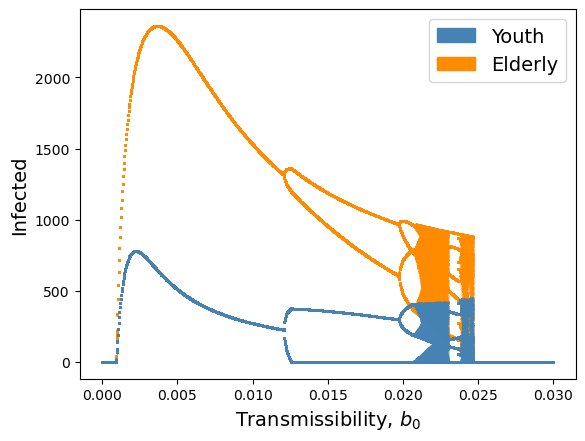

In [31]:
plt.plot(r, x, ls='', marker='o', markersize=.2, label = "old", color='darkorange')
plt.plot(r, x2, ls='', marker='o', markersize=.2, label = "young", color='steelblue')
#plt.plot( r,x, ls='', marker=',', label = "old", markersize=20)
#plt.plot( r,x2, ls='', marker=',', label = "young", markeredgewidth=2 )

plt.xlabel(r"Transmissibility, $b_0$", size = 14)
plt.ylabel("Infected", size = 14)

old = mpatches.Patch(color='darkorange', label='Elderly')
young = mpatches.Patch(color='steelblue', label='Youth')

plt.legend(handles=[young,old], fontsize = 14)
plt.savefig("bifurcatoin_model_b0.jpg", dpi = 200)


## Bifurcation Graph - changing C12

In [32]:
#equation1 parameters
N1 = 5000
N = 10000
gamma = .1
chat1 = .02

a = 1
a21 = 20
a22 = 40

chat2 = .01
N2 = 5000

b0 = 0.009
a1=  (a21*b0)/(2*a)
a2= (a22*b0)/(2*a)

In [33]:
#equation1
def equation1(i,j,c12):
    return ((a1*b0)/N)*(i*i*i) + ((a1*b0)*(j/N) - b0*chat1 - a1*b0*(N1/N))*(i*i) + (b0*chat1*N1 - b0*a1*j*(N1/N) - b0*c12*j + 1 - gamma)*i + (b0 * c12*j*N1)

In [34]:
#equation2
def equation2(i,j,c12):
    return ((a2*b0)/N)*(j*j*j) + ((a2*b0)*(i/N) - b0*chat2 - a2*b0*(N2/N))*(j*j) + (b0*chat2*N2 - b0*a2*i*(N2/N) - b0*c12*i + 1 - gamma)*j + (b0 * c12*i*N2)

In [35]:
#modeling


i = 1
j = 1
y = [i]
y2 = [j]


def recalc_ij(i,j, c12):
            
    i_temp = equation1(i,j,c12)
    j_temp = equation2(i,j,c12)
    
    if i_temp < 0: i_temp = 0
    if i_temp > N1: i_temp = N1
    if j_temp < 0: j_temp = 0
    if j_temp > N2: j_temp = N2
         
    i = i_temp
    j = j_temp
    return i,j
    



In [36]:
def bifunc():
    R_val = []
    X_val = []

    X_val2 = []
    
    R = np.linspace(0, .2, 5000)
    for r in R:
        i = 1
        j = 1
        c12 = r
        for iterations in range(1500):
            i, j = recalc_ij(i,j, c12)
            if iterations > 1000:
                R_val.append(c12)
                X_val.append(i)
                X_val2.append(j)
    return R_val, X_val, X_val2
    

r, x, x2 = bifunc()

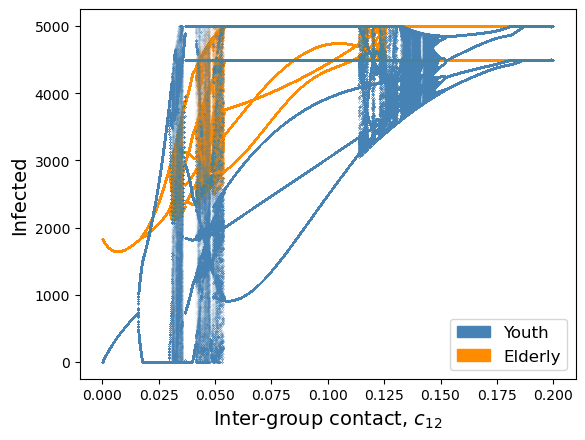

In [42]:
plt.plot(r, x, ls='', marker='.', markersize=.05, label = "Elderly", color='darkorange')
plt.plot(r, x2, ls='', marker='.', markersize=.05, label = "Youth", color='steelblue')

plt.xlabel(r"Inter-group contact, $c_{12}$", size = 14)
plt.ylabel("Infected", size = 14)

old = mpatches.Patch(color='darkorange', label='Elderly')
young = mpatches.Patch(color='steelblue', label='Youth')

plt.legend(handles=[young, old], fontsize = 12)
plt.savefig("bifurcatoin_model_c12.jpg", dpi = 200)
